In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

haberman = pd.read_csv("haberman.csv")

In [3]:
print(haberman.columns)

Index(['30', '64', '1', '1.1'], dtype='object')


- '30' = Age
- '64' = Operation_age
- '1' = Auxillary_Nodes
- '1.1' = Survival_Status

In [4]:
haberman['1.1'].value_counts()
# haberman.head()

1    224
2     81
Name: 1.1, dtype: int64

# Plotting Graphs

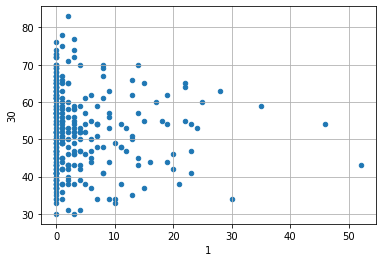

In [5]:
haberman.plot(kind='scatter', x='1', y='30')
plt.grid()
plt.show()

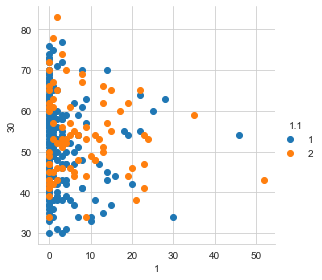

In [6]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman,hue="1.1", size=4).map(plt.scatter, '1', '30').add_legend()
plt.show()

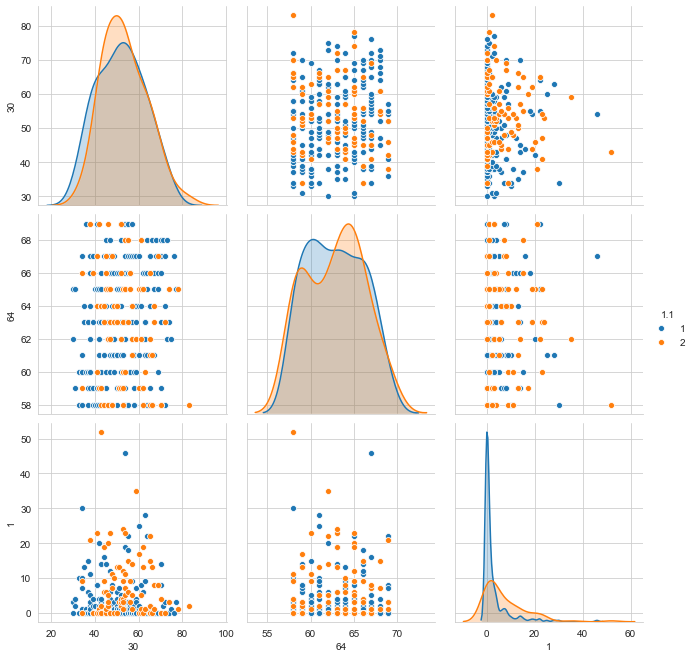

In [7]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(haberman,hue="1.1", size=3, vars=['30','64','1'])
plt.show()

#### 1-D scatter plot for age vs auxillary nodes.

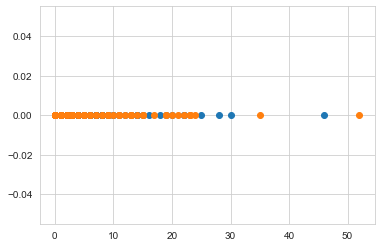

In [8]:
haberman_Long_Survive = haberman.loc[haberman["1.1"] == 1]
haberman_Short_Survive = haberman.loc[haberman['1.1'] == 2]
plt.plot(haberman_Long_Survive['1'], np.zeros_like(haberman_Long_Survive['1']), 'o')
plt.plot(haberman_Short_Survive['1'], np.zeros_like(haberman_Short_Survive['1']), 'o')
plt.show()

## PDF and CDF

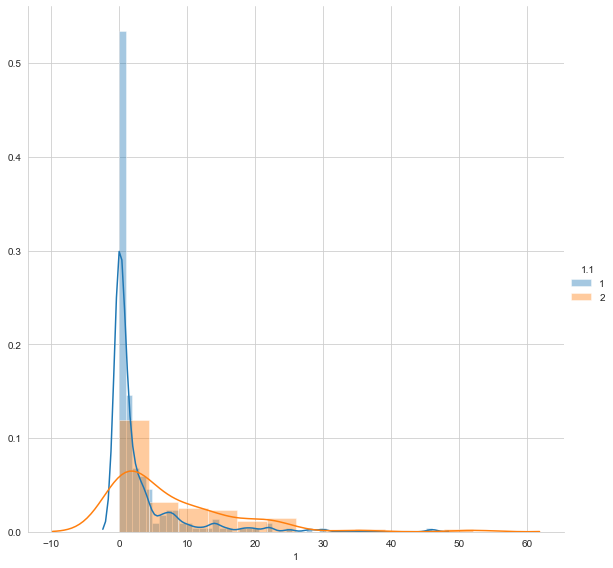

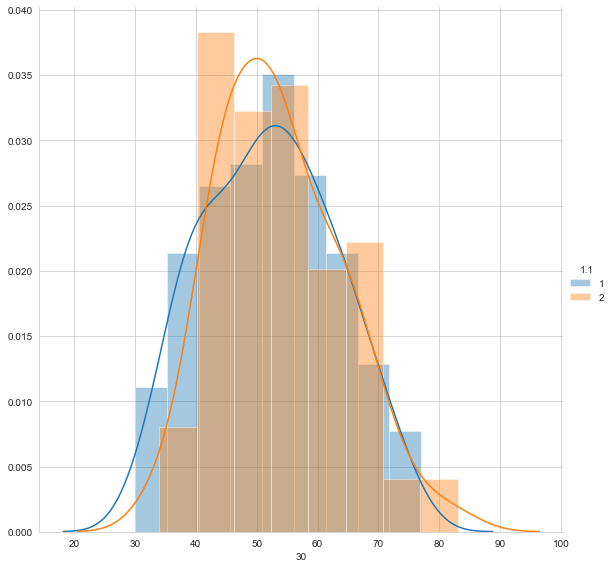

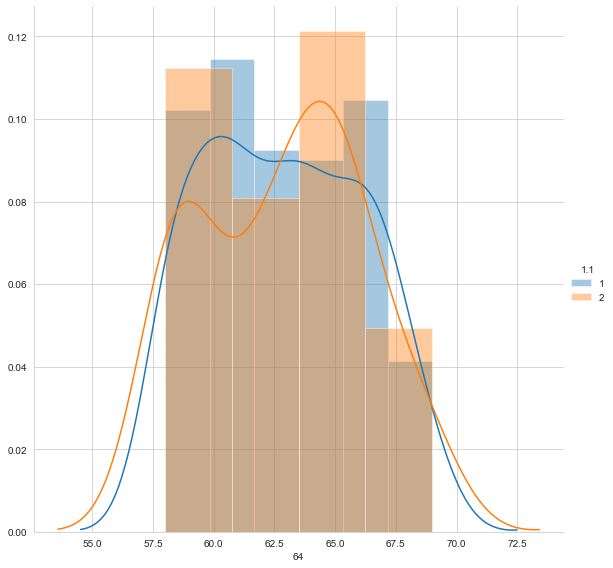

In [9]:
sns.FacetGrid(haberman,hue='1.1', size=8).map(sns.distplot,'1').add_legend()
sns.FacetGrid(haberman,hue='1.1', size=8).map(sns.distplot,'30').add_legend()
sns.FacetGrid(haberman,hue='1.1', size=8).map(sns.distplot,'64').add_legend()

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


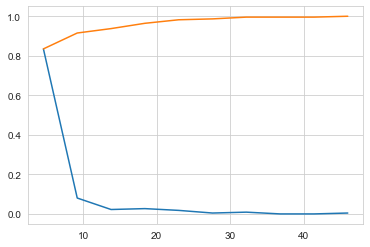

In [10]:
counts, bin_edges = np.histogram(haberman_Long_Survive['1'], bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


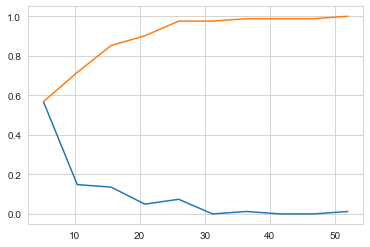

In [11]:
counts, bin_edges = np.histogram(haberman_Short_Survive['1'], bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.show()

In [12]:
print("Means:")
print (np.mean(haberman_Long_Survive['1']))
print (np.mean(np.append(haberman_Long_Survive['1'],50)))
print (np.mean(haberman_Short_Survive['1']))
print("\nStandard Deviation:")
print(np.mean(haberman_Long_Survive['1']))
print(np.mean(haberman_Short_Survive['1']))

Means:
2.799107142857143
3.008888888888889
7.45679012345679

Standard Deviation:
2.799107142857143
7.45679012345679


In [13]:
print('Medians:')
print(np.median(haberman_Long_Survive['1']))
print(np.median(np.append(haberman_Long_Survive['1'],50)))
print(np.median(haberman_Short_Survive['1']))
print('\nQuantiles:')
print(np.percentile(haberman_Long_Survive['1'],np.arange(0,100,25)))
print(np.percentile(haberman_Short_Survive['1'],np.arange(0,100,25)))
print('\n90th percentile:')
print(np.percentile(haberman_Long_Survive['1'],90))
print(np.percentile(haberman_Short_Survive['1'],90))
from statsmodels import robust
print ('\nMedian Absolute Deviation')
print(robust.mad(haberman_Long_Survive['1']))
print(robust.mad(haberman_Short_Survive['1']))

Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th percentile:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


## Box, Violin and Joint Plots

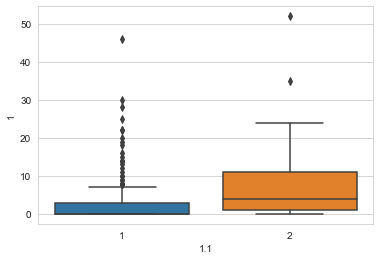

In [14]:
sns.boxplot(x='1.1', y='1', data=haberman)
plt.show()

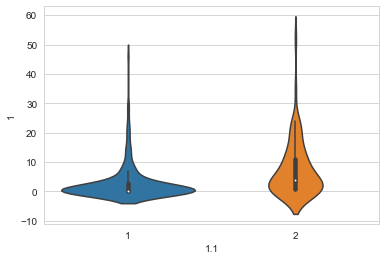

In [15]:
sns.violinplot(x='1.1', y='1', data=haberman)
plt.show()

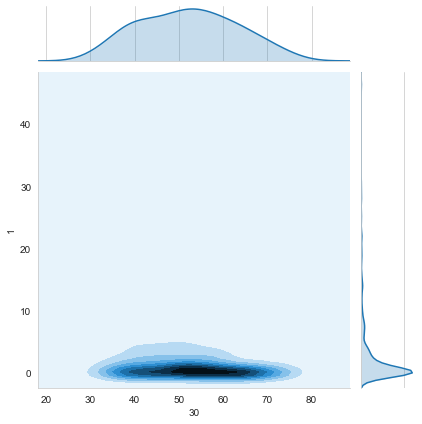

In [16]:
sns.jointplot(x='30', y='1', data=haberman_Long_Survive, kind='kde')
plt.grid()
plt.show()